# Investment Analysis Assignment - EDA

In [4]:
#Importing all the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Checkpoint 1: Data Cleaning 1

In [5]:
#Reading the companies.csv file and decoding
companies = pd.read_csv('Companies.csv',encoding='ISO-8859-1')
companies['permalink'] = companies['permalink'].str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
companies['name'] = companies['name'].str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [6]:
#Reading rounds2.csv file and decoding
rounds2 = pd.read_csv('rounds2.csv',encoding='ISO-8859-1')
rounds2['company_permalink'] = rounds2['company_permalink'].str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [7]:
#Reading the mapping file
mapping = pd.read_csv('mapping.csv')

In [8]:
#converting the company_permalink to lower case
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()

In [9]:
#Number of unique company in rounds2.csv file
rounds2['company_permalink'].str.lower().nunique()

66368

In [10]:
#Confirmation
rounds2['company_permalink'].str.lower().describe()

count                       114949
unique                       66368
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

In [11]:
#converting permalink to lower case
companies['permalink'] = companies['permalink'].str.lower()

In [12]:
#Number of unique companies in companies.csv file
companies['permalink'].str.lower().nunique()

66368

In [13]:
#confirmation
companies['permalink'].str.lower().describe()

count                     66368
unique                    66368
top       /organization/genasys
freq                          1
Name: permalink, dtype: object

In [14]:
#Checking Are there any companies in the rounds2 file which are not present in companies
set(rounds2['company_permalink'].unique()).difference(set(companies['permalink'].unique()))

#one more method
#temp1 = pd.DataFrame(companies['permalink'].unique())
#temp2 = pd.DataFrame(rounds2['company_permalink'].unique())
#temp1.equals(temp2)

set()

# Checkpoint 2: Funding Type Analysis

In [15]:
#Merging the rounds2 dataframe and company dataframe
master_frame = pd.merge(rounds2,companies,how='left',left_on='company_permalink',right_on='permalink')
#checking the shape of the data frame
master_frame.shape

(114949, 16)

In [16]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [17]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [18]:
round(master_frame.isnull().sum()/len(master_frame.index)*100,2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [19]:
#droping the columns which are not required for our analysis
master_frame = master_frame.drop(['city','homepage_url','status','state_code','region','founded_at','funding_round_code','funding_round_permalink','funded_at','permalink'],axis=1)

In [20]:
master_frame['raised_amount_usd'].isnull().sum()

19990

In [21]:
#droping the NAN values for 'raised-amount-usd','category_list',country_code
master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull()|master_frame['category_list'].isnull()|
                              master_frame['country_code'].isnull())]

In [22]:
round(master_frame.isnull().sum()/len(master_frame.index)*100,2)

company_permalink     0.0
funding_round_type    0.0
raised_amount_usd     0.0
name                  0.0
category_list         0.0
country_code          0.0
dtype: float64

In [23]:
(len(master_frame.index)/114949)*100

77.01589400516751

In [24]:
master_frame.shape

(88529, 6)

In [25]:
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

In [26]:
master_frame['funding_round_type'].value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [27]:
#As per the client requirement considering only 4 funding_round_types 'seed,venture,private_equity,angel'
master_frame = master_frame[master_frame['funding_round_type'].isin(['seed','angel','venture','private_equity'])]

In [28]:
#converting $ to millon $ so it will be easy to analysis
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd']/1000000

In [29]:
round(master_frame.groupby('funding_round_type')['raised_amount_usd'].mean(),2)

funding_round_type
angel              0.97
private_equity    73.94
seed               0.75
venture           11.72
Name: raised_amount_usd, dtype: float64

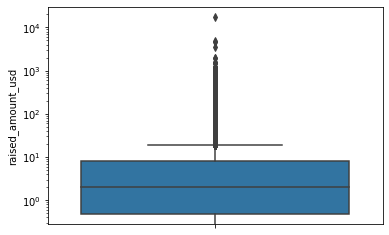

In [30]:
sns.boxplot(y='raised_amount_usd',data=master_frame);
plt.yscale('log')
plt.show()

### There is lot of outliers and there is huge difference between the mean and median value of raised_amount_usd. hence we are considering median value for our analysis

In [31]:
#comparing between mean and median
master_frame.pivot_table(values='raised_amount_usd',columns='funding_round_type',aggfunc=[np.mean,np.median])

mean                                        median  \
funding_round_type     angel private_equity      seed    venture     angel   
raised_amount_usd   0.971574      73.938486  0.747794  11.724223  0.414906   

                                                
funding_round_type private_equity seed venture  
raised_amount_usd            20.0  0.3     5.0

In [32]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
private_equity    20.000000
venture            5.000000
angel              0.414906
seed               0.300000
Name: raised_amount_usd, dtype: float64

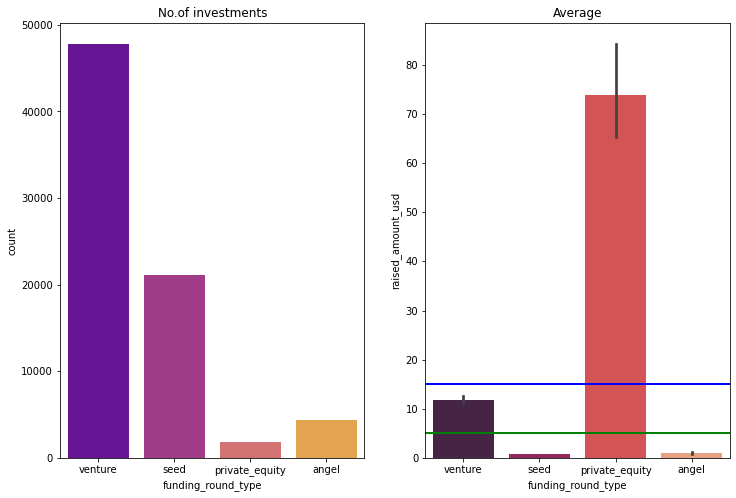

In [33]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.countplot(x='funding_round_type',palette = 'plasma',data=master_frame)
plt.title('No.of investments')

plt.subplot(1,2,2)
sns.barplot(x='funding_round_type',y='raised_amount_usd',palette='rocket',data=master_frame)
plt.title('Average')

plt.axhline(y=5,linewidth=2,color='g')
plt.axhline(y=15,linewidth=2,color='b')
plt.show()

# Checkpoint 3: Country Analysis

In [34]:
#keeping rows with only venture type. As Spark Funds wants to invest between 5 to 15 million USD per investment round 
master_frame = master_frame[master_frame['funding_round_type']=='venture']

In [35]:
master_frame.shape

(47809, 6)

In [36]:
top9 = master_frame.pivot_table(values='raised_amount_usd',index='country_code',aggfunc='sum').sort_values(by='raised_amount_usd',ascending=False).head(9)

In [37]:
#top9 countries with maximum funding amount
top9

,raised_amount_usd
country_code,
USA,420068.029342
CHN,39338.918773
GBR,20072.813004
IND,14261.508718
CAN,9482.217668
FRA,7226.851352
ISR,6854.350477
DEU,6306.921981
JPN,3167.647127


In [38]:
'''
By absorving the document attached in the assignment section or the link given 
the top 3 inglish speaking countries are 'USA,GBR and IND' ''';

In [39]:
master_frame = master_frame[master_frame['country_code'].isin(['IND','USA','GBR'])]

In [40]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10.0,#fame,Media,IND
10,/organization/0xdata,venture,20.0,H2O.ai,Analytics,USA
11,/organization/0xdata,venture,1.7,H2O.ai,Analytics,USA
12,/organization/0xdata,venture,8.9,H2O.ai,Analytics,USA
22,/organization/1-mainstream,venture,5.0,1 Mainstream,Apps|Cable|Distribution|Software,USA


# Checkpoint 4: Sector Analysis 1

In [41]:
#creating the primary_sector column by taking first value of category list 
#i.e eg:Apps|Cable|Distribution|Software considering apps as per the requirement
master_frame['primary_sector'] = master_frame['category_list'].apply(lambda x:x.split('|')[0])
master_frame['category_list'] = master_frame['category_list'].apply(lambda x:x.split('|')[0])

In [42]:
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [43]:
#there is one empty row in the mapping data frame removig it for further analysis
mapping = mapping[~mapping['category_list'].isnull()]
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [44]:
#Cleaning the mapping.csv file 
#replacing 0 with na in category_list column
mapping['category_list']= mapping['category_list'].apply(lambda x:x.replace('0','na'))

In [45]:
#using pd.melt to structure the mapping file which has identifier column and multiple measured variables
mapping = pd.melt(mapping, id_vars =['category_list']) 
mapping = mapping[~(mapping.value == 0)]
mapping = mapping.drop('value', axis = 1)
mapping = mapping.rename(columns = {"variable":"main_sector"})
mapping.head()

,category_list,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports


In [46]:
#merging master_frame with the mapping data frame using left join
master_frame = master_frame.merge(mapping, how = 'left', on ='category_list')
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector
0,/organization/-fame,venture,10.0,#fame,Media,IND,Media,Entertainment
1,/organization/0xdata,venture,20.0,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
2,/organization/0xdata,venture,1.7,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,venture,8.9,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,venture,5.0,1 Mainstream,Apps,USA,Apps,"News, Search and Messaging"


In [47]:
master_frame.isnull().sum()

company_permalink       0
funding_round_type      0
raised_amount_usd       0
name                    0
category_list           0
country_code            0
primary_sector          0
main_sector           165
dtype: int64

In [48]:
master_frame = master_frame[~master_frame['main_sector'].isnull()]

# Checkpoint 5: Sector Analysis 2

In [49]:
master_frame.shape

(38638, 8)

In [50]:
master_frame_budget = master_frame[(master_frame['raised_amount_usd']>= 5) & (master_frame['raised_amount_usd']<=15)]

In [51]:
# For the country USA between 5 to 15 Millions doller
D1 = master_frame[(master_frame['raised_amount_usd']>= 5) & (master_frame['raised_amount_usd']<=15) 
                  & (master_frame['country_code']=='USA')]

In [52]:
# For the country GBR between 5 to 15 Millions doller
D2 = master_frame[(master_frame['raised_amount_usd']>= 5) & (master_frame['raised_amount_usd']<=15) 
                  & (master_frame['country_code']=='GBR')]

In [53]:
# For the country IND between 5 to 15 Millions doller
D3 = master_frame[(master_frame['raised_amount_usd']>= 5) & (master_frame['raised_amount_usd']<=15) 
                  & (master_frame['country_code']=='IND')]

## Total number of investments

In [54]:
#For USA
D1['main_sector'].count()

12012

In [55]:
#For GBR
D2['main_sector'].count()

619

In [56]:
#For IND
D3['main_sector'].count()

328

## Total amount of investment (USD)

In [57]:
#For USA
round(D1['raised_amount_usd'].sum(),2)

107318.29

In [58]:
#For GBR
round(D2['raised_amount_usd'].sum(),2)

5365.23

In [59]:
#For IND
round(D3['raised_amount_usd'].sum(),2)

2949.54

### Top sector (based on count of investments) For USA

In [60]:
D1['main_sector'].value_counts()

Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2300
News, Search and Messaging                 1582
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: main_sector, dtype: int64

### Top sector (based on count of investments) For GBR

In [61]:
D2['main_sector'].value_counts()

Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 128
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: main_sector, dtype: int64

### Top sector (based on count of investments) For IND

In [62]:
D3['main_sector'].value_counts()

Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: main_sector, dtype: int64

### For the top sector count-wise, which company received the highest investment?

#### For country USA

In [63]:
company = D1[D1['main_sector']=='Others']

In [64]:
company.pivot_table(values='raised_amount_usd',index='company_permalink',aggfunc=sum).sort_values(by = 'raised_amount_usd',ascending=False).head(1)

,raised_amount_usd
company_permalink,
/organization/virtustream,64.3


### For the second-best sector count-wise, which company received the highest investment?
#### For country USA

In [65]:
company = D1[D1['main_sector']=='Social, Finance, Analytics, Advertising']

In [66]:
company.pivot_table(values='raised_amount_usd',index='company_permalink',aggfunc=sum).sort_values(by = 'raised_amount_usd',ascending=False).head(1)

,raised_amount_usd
company_permalink,
/organization/shotspotter,67.933006


### For the top sector count-wise, which company received the highest investment?

#### For country GBR

In [67]:
company = D2[D2['main_sector']=='Others']

In [68]:
company.pivot_table(values='raised_amount_usd',index='company_permalink',aggfunc=sum).sort_values(by = 'raised_amount_usd',ascending=False).head(1)

,raised_amount_usd
company_permalink,
/organization/electric-cloud,37.0


### For the second-best sector count-wise, which company received the highest investment?
#### For country GBR

In [69]:
company = D2[D2['main_sector']=='Social, Finance, Analytics, Advertising']

In [70]:
company.pivot_table(values='raised_amount_usd',index='company_permalink',aggfunc=sum).sort_values(by = 'raised_amount_usd',ascending=False).head(1)

,raised_amount_usd
company_permalink,
/organization/celltick-technologies,37.5


### For the top sector count-wise, which company received the highest investment?
#### For country IND

In [71]:
company = D3[D3['main_sector']=='Others']

In [72]:
company.pivot_table(values='raised_amount_usd',index='company_permalink',aggfunc=sum).sort_values(by = 'raised_amount_usd',ascending=False).head(1)

,raised_amount_usd
company_permalink,
/organization/firstcry-com,39.0


### For the second-best sector count-wise, which company received the highest investment?
#### For country IND

In [73]:
company = D3[D3['main_sector']=='Social, Finance, Analytics, Advertising']

In [74]:
company.pivot_table(values='raised_amount_usd',index='company_permalink',aggfunc=sum).sort_values(by = 'raised_amount_usd',ascending=False).head(1)

,raised_amount_usd
company_permalink,
/organization/manthan-systems,50.7


##### grouping the master_frane data frame for better conclusion

In [75]:
master_top_3 = master_frame_budget.groupby(['country_code','main_sector'])['raised_amount_usd'].agg(['count','sum'])

In [76]:
master_top_3.rename(columns={'count':'Total_no_investment','sum':'Total_amount_invested'},inplace=True)

In [77]:
master_top_3

Total_no_investment  \
country_code main_sector                                                    
GBR          Automotive & Sports                                       16   
             Cleantech / Semiconductors                               128   
             Entertainment                                             56   
             Health                                                    24   
             Manufacturing                                             42   
             News, Search and Messaging                                73   
             Others                                                   147   
             Social, Finance, Analytics, Advertising                  133   
IND          Automotive & Sports                                       13   
             Cleantech / Semiconductors                                20   
             Entertainment                                             33   
             Health                                                    19   
             Manufacturing                                             21   
             News, Search and Messaging                                52   
             Others                                                   110   
             Social, Finance, Analytics, Advertising                   60   
USA          Automotive & Sports                                      167   
             Cleantech / Semiconductors                              2300   
             Entertainment                                            591   
             Health                                                   909   
             Manufacturing                                            799   
             News, Search and Messaging                              1582   
             Others                                                  2950   
             Social, Finance, Analytics, Advertising                 2714   

                                                      Total_amount_invested  
country_code main_sector                                                     
GBR          Automotive & Sports                                 167.051565  
             Cleantech / Semiconductors                         1150.139665  
             Entertainment                                       482.784687  
             Health                                              214.537510  
             Manufacturing                                       361.940335  
             News, Search and Messaging                          615.746235  
             Others                                             1283.624289  
             Social, Finance, Analytics, Advertising            1089.404014  
IND          Automotive & Sports                                 136.900000  
             Cleantech / Semiconductors                          165.380000  
             Entertainment                                       280.830000  
             Health                                              167.740000  
             Manufacturing                                       200.900000  
             News, Search and Messaging                          433.834545  
             Others                                             1013.409507  
             Social, Finance, Analytics, Advertising             550.549550  
USA          Automotive & Sports                                1454.104361  
             Cleantech / Semiconductors                        21206.628192  
             Entertainment                                      5099.197982  
             Health                                             8211.859357  
             Manufacturing                                      7258.553378  
             News, Search and Messaging                        13959.567428  
             Others                                            26321.007002  
             Social, Finance, Analytics, Advertising           23807.376964

# Checkpoint 6: Plots

###### A plot showing the top 9 countries against the total amount of investments of funding type venture.


In [78]:
top9 = pd.DataFrame(top9)

In [79]:
top9.reset_index(inplace=True)

In [80]:
top9

,country_code,raised_amount_usd
0,USA,420068.029342
1,CHN,39338.918773
2,GBR,20072.813004
3,IND,14261.508718
4,CAN,9482.217668
5,FRA,7226.851352
6,ISR,6854.350477
7,DEU,6306.921981
8,JPN,3167.647127


In [81]:
TIC_USA = pd.DataFrame(D1.groupby(['country_code','main_sector'])['main_sector'].count().rename('Total_investment_count').sort_values(ascending=False).head(3))

In [82]:
TIC_USA.reset_index(inplace=True)

In [83]:
TIC_GBR = pd.DataFrame(D2.groupby(['country_code','main_sector'])['main_sector'].count().rename('Total_investment_count').sort_values(ascending=False).head(3))

In [84]:
TIC_GBR.reset_index(inplace=True)

In [85]:
TIC_IND = pd.DataFrame(D3.groupby(['country_code','main_sector'])['main_sector'].count().rename('Total_investment_count').sort_values(ascending=False).head(3))

In [86]:
TIC_IND.reset_index(inplace=True)

In [87]:
top3 = pd.concat([TIC_USA,TIC_GBR,TIC_IND])

In [88]:
top3

,country_code,main_sector,Total_investment_count
0,USA,Others,2950
1,USA,"Social, Finance, Analytics, Advertising",2714
2,USA,Cleantech / Semiconductors,2300
0,GBR,Others,147
1,GBR,"Social, Finance, Analytics, Advertising",133
2,GBR,Cleantech / Semiconductors,128
0,IND,Others,110
1,IND,"Social, Finance, Analytics, Advertising",60
2,IND,"News, Search and Messaging",52


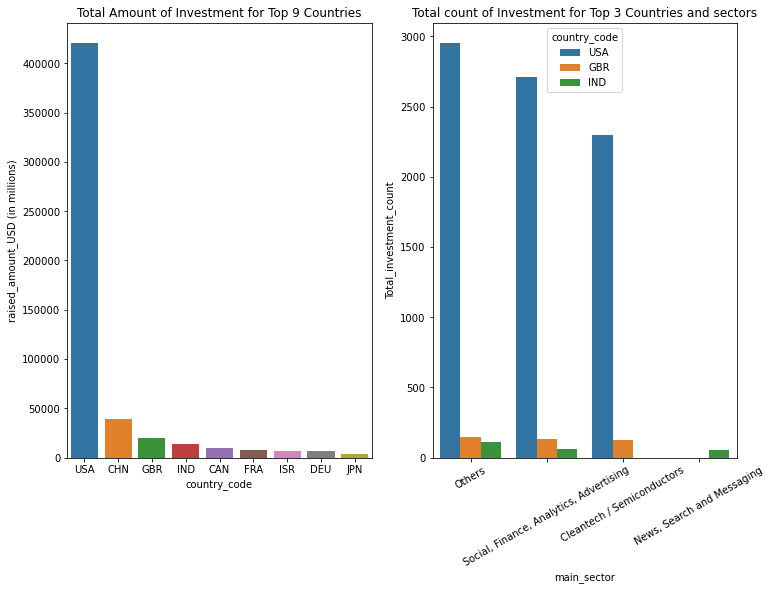

In [89]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.barplot(x='country_code',y='raised_amount_usd',data=top9)
plt.title('Total Amount of Investment for Top 9 Countries')
plt.ylabel('raised_amount_USD (in millions)')

plt.subplot(1,2,2)
a = sns.barplot(x='main_sector',y='Total_investment_count',hue='country_code',data=top3)
a.set_xticklabels(a.get_xticklabels(),rotation=30)
plt.title('Total count of Investment for Top 3 Countries and sectors')
plt.show()